# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import requests 
import json
import random
from citipy import citipy
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts

# Import API key
from api_keys import (weather_api_key, g_key)

In [62]:
lat = []
lng = []
cities = []

i = 0 #lat index
j = 0 #lng index

for x in range(1500):
    r_lat = random.uniform(-90, 90)
    lat.append(r_lat)
    r_lng = random.uniform(-180, 180)
    lng.append(r_lng)
    
    city = citipy.nearest_city(lat[i],lng[j])
    name_city = city.city_name
    if name_city not in cities:
        cities.append(name_city)
    i=i+1
    j=j+1

len(cities)

623

In [2]:
### Perform API Calls
# * Perform a weather check on each city using a series of successive API calls.
# * Include a print log of each city as it'sbeing processed (with the city number and city name).

In [63]:
from api_keys import weather_api_key

url = 'http://api.openweathermap.org/data/2.5/weather?q='
units = 'imperial'

new_cities = []
new_lat = []
new_lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

n = 1
for city in cities:    
    try:
        query_url = f'{url}{city}&appid={weather_api_key}&units={units}'
        response = requests.get(query_url).json()
        print('City number '+ str(n) +': ' + response['name'])
        n = n + 1
        new_cities.append(response['name'])
        new_lat.append(response['coord']['lat'])
        new_lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
    except KeyError:
        print('City not found. Skipping...')

City number 1: Ilulissat
City number 2: Bluff
City number 3: Indianola
City number 4: Chicama
City number 5: Hilo
City number 6: Atuona
City number 7: Fershampenuaz
City not found. Skipping...
City number 8: Bredasdorp
City number 9: Alofi
City number 10: Rikitea
City number 11: Watsa
City not found. Skipping...
City number 12: Ushuaia
City number 13: Scottsbluff
City number 14: Albany
City number 15: Darnah
City number 16: Avarua
City number 17: Yellowknife
City number 18: Cherskiy
City number 19: Bethel
City number 20: Gwadar
City not found. Skipping...
City number 21: Puerto Ayora
City number 22: Port Alfred
City number 23: Kaitangata
City number 24: Castaños
City number 25: Saint Paul Harbor
City number 26: Dzilam González
City number 27: Point Pedro
City number 28: Kapaa
City number 29: Kitimat
City number 30: Kenitra
City number 31: Carnarvon
City number 32: Ambilobe
City number 33: Karlstadt am Main
City number 34: Bolobo
City not found. Skipping...
City number 35: Cuauhtémoc
Ci

In [69]:
len(new_cities)

582

In [70]:
new_cities

['Ilulissat',
 'Bluff',
 'Indianola',
 'Chicama',
 'Hilo',
 'Atuona',
 'Fershampenuaz',
 'Bredasdorp',
 'Alofi',
 'Rikitea',
 'Watsa',
 'Ushuaia',
 'Scottsbluff',
 'Albany',
 'Darnah',
 'Avarua',
 'Yellowknife',
 'Cherskiy',
 'Bethel',
 'Gwadar',
 'Puerto Ayora',
 'Port Alfred',
 'Kaitangata',
 'Castaños',
 'Saint Paul Harbor',
 'Dzilam González',
 'Point Pedro',
 'Kapaa',
 'Kitimat',
 'Kenitra',
 'Carnarvon',
 'Ambilobe',
 'Karlstadt am Main',
 'Bolobo',
 'Cuauhtémoc',
 'Port-Gentil',
 'Bairiki Village',
 'Codrington',
 'Hithadhoo',
 'Saint-Philippe',
 'Cape Town',
 'Sarkand',
 'Fairbanks',
 'Hermanus',
 'Katsuura',
 'Qaanaaq',
 'Barinas',
 'Hong Kong',
 'Lubawa',
 'Plettenberg Bay',
 'Kapit',
 'Jamestown',
 'Ballina',
 'Barrow',
 'Karur',
 'Ponta do Sol',
 'Chokurdakh',
 'Tiksi',
 'Kahului',
 'Vaini',
 'Parakou',
 'Det Udom',
 'Faanui',
 'Chifeng',
 'Zaysan',
 'Langenburg',
 'Tasiilaq',
 'East London',
 'Hasaki',
 'Port Lincoln',
 'Narsaq',
 'Lavrentiya',
 'Mataura',
 'Elko',
 'Soria

## Generate Cities List

In [72]:
cityweather_df = pd.DataFrame({'City' : new_cities, 
                                'Lat' : new_lat, 
                                'Lng' : new_lng, 
                                'Max Temp' : max_temp,
                                'Humidity' : humidity,
                                'Cloudiness' : cloudiness,
                                'Wind Speed' : wind_speed,
                                'Country' : country,
                                'Date' : date})
cityweather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ilulissat,69.2167,-51.1000,39.22,60,3,0.00,GL,1622686274
1,Bluff,-46.6000,168.3333,49.80,76,76,7.38,NZ,1622686274
2,Indianola,41.3581,-93.5574,71.85,68,5,2.84,US,1622686275
3,Chicama,-7.8447,-79.1469,65.88,82,100,5.86,PE,1622686275
4,Hilo,19.7297,-155.0900,82.13,66,20,9.22,US,1622686275


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [75]:
# save as csv
cityweather_df.to_csv('Output_data/cityweather_data.csv')

In [5]:
# open and read 
cities_df = pd.read_csv('Output_data/cityweather_data.csv')
cities_df.head()

,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,Ilulissat,69.2167,-51.1000,39.22,60,3,0.00,GL,1622686274
1,1,Bluff,-46.6000,168.3333,49.80,76,76,7.38,NZ,1622686274
2,2,Indianola,41.3581,-93.5574,71.85,68,5,2.84,US,1622686275
3,3,Chicama,-7.8447,-79.1469,65.88,82,100,5.86,PE,1622686275
4,4,Hilo,19.7297,-155.0900,82.13,66,20,9.22,US,1622686275


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [77]:
 # check for and clean out impossible statistics
cities_df[cities_df["Humidity"]>100]

,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [78]:
#  Get the indices of cities that have humidity over 100%.
ind = cities_df[cities_df["Humidity"]>100].index
ind

Int64Index([], dtype='int64')

In [79]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the cities DataFrame, which we call "clean_cities".
cleaned_cities = cities_df.drop(ind)

cleaned_cities

,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,Ilulissat,69.2167,-51.1000,39.22,60,3,0.00,GL,1622686274
1,1,Bluff,-46.6000,168.3333,49.80,76,76,7.38,NZ,1622686274
2,2,Indianola,41.3581,-93.5574,71.85,68,5,2.84,US,1622686275
3,3,Chicama,-7.8447,-79.1469,65.88,82,100,5.86,PE,1622686275
4,4,Hilo,19.7297,-155.0900,82.13,66,20,9.22,US,1622686275
...,...,...,...,...,...,...,...,...,...,...
577,577,Itaituba,-4.2761,-55.9836,78.85,73,61,1.74,BR,1622686448
578,578,Takhtamygda,54.1000,123.5667,63.66,57,69,8.97,RU,1622686448
579,579,Los Algarrobos,8.5000,-82.4333,81.45,86,100,1.81,PA,1622686448
580,580,Lerwick,60.1545,-1.1494,50.00,87,3,14.09,GB,1622686449


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [80]:
# set variables for later plotting--easier to do in one central location

# scatter plot variables
latitude = cleaned_cities['Lat']
max_temp = cleaned_cities['Max Temp']
humidity = cleaned_cities['Humidity']
cloudiness = cleaned_cities['Cloudiness']
wind_speed = cleaned_cities['Wind Speed']

# scatter plot and linear regression variables for lat > 0 
north_df = cleaned_cities[cleaned_cities["Lat"]>0]
north_latitude = north_df["Lat"]

max_temp_north = north_df['Max Temp']
humidity_north = north_df['Humidity']
cloudiness_north = north_df['Cloudiness']
wind_speed_north = north_df['Wind Speed']

# scatter plot and linear regression variables for lat < 0 
south_df = cleaned_cities[cleaned_cities["Lat"]<0]
south_latitude = south_df["Lat"]

max_temp_south = south_df['Max Temp']
humidity_south = south_df['Humidity']
cloudiness_south = south_df['Cloudiness']
wind_speed_south = south_df['Wind Speed']

## Latitude vs. Temperature Plot

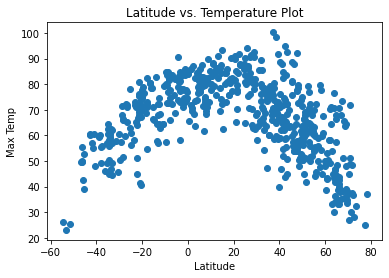

In [86]:
plt.scatter(latitude, max_temp)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs. Temperature Plot")
plt.savefig('Output_data/Fig1.png')
plt.show()

## Latitude vs. Humidity Plot

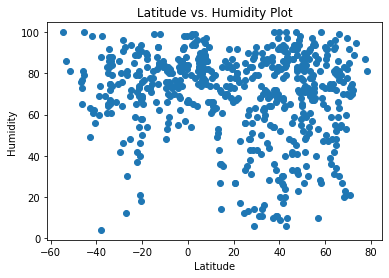

In [87]:
plt.scatter(latitude, humidity)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity Plot")
plt.savefig('Output_data/Fig2.png')
plt.show()

## Latitude vs. Cloudiness Plot

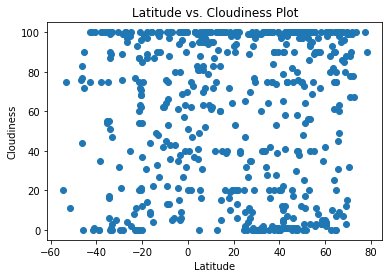

In [88]:
plt.scatter(latitude, cloudiness)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness Plot")
plt.savefig('Output_data/Fig3.png')
plt.show()

## Latitude vs. Wind Speed Plot

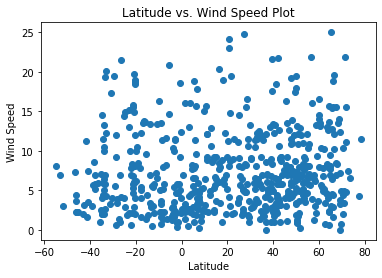

In [89]:
plt.scatter(latitude, wind_speed)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed Plot")
plt.savefig('Output_data/Fig4.png')
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

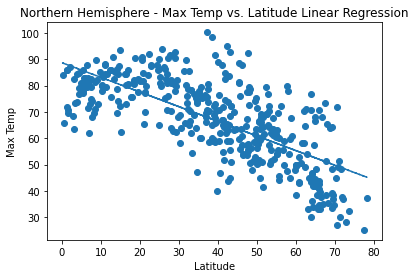

In [90]:
plt.scatter(north_latitude, max_temp_north)

slope, intercept, r, p, std_err = st.linregress(north_latitude, max_temp_north)
fit = slope * north_latitude + intercept
plt.plot(north_latitude,fit,"--")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.savefig('Output_data/Fig5.png')

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

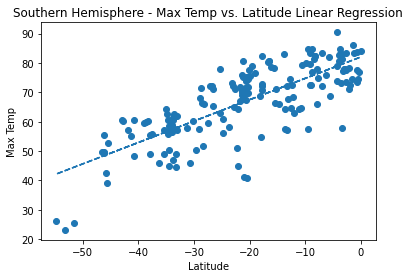

In [91]:
 plt.scatter(south_latitude, max_temp_south)

slope, intercept, r, p, std_err = st.linregress(south_latitude, max_temp_south)
fit = slope * south_latitude + intercept
plt.plot(south_latitude,fit,"--")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.savefig('Output_data/Fig6.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

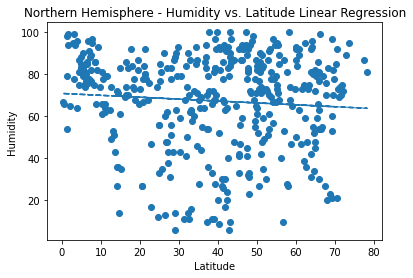

In [92]:
 plt.scatter(north_latitude, humidity_north)

slope, intercept, r, p, std_err = st.linregress(north_latitude, humidity_north)
fit = slope * north_latitude + intercept
plt.plot(north_latitude,fit,"--")

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.savefig('Output_data/Fig7.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

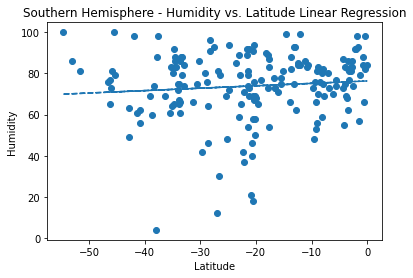

In [93]:
 plt.scatter(south_latitude, humidity_south)

slope, intercept, r, p, std_err = st.linregress(south_latitude, humidity_south)
fit = slope * south_latitude + intercept
plt.plot(south_latitude,fit,"--")

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.savefig('Output_data/Fig8.png')

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

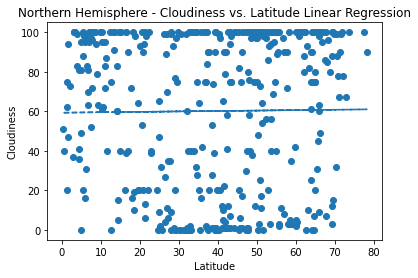

In [94]:
plt.scatter(north_latitude, cloudiness_north)

slope, intercept, r, p, std_err = st.linregress(north_latitude, cloudiness_north)
fit = slope * north_latitude + intercept
plt.plot(north_latitude,fit,"--")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.savefig('Output_data/Fig9.png')

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

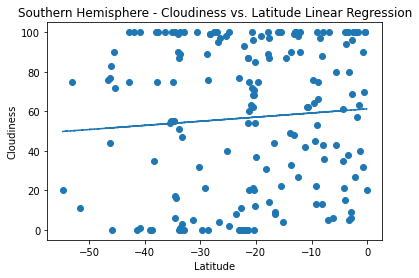

In [95]:
plt.scatter(south_latitude, cloudiness_south)

slope, intercept, r, p, std_err = st.linregress(south_latitude, cloudiness_south)
fit = slope * south_latitude + intercept
plt.plot(south_latitude,fit,"--")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.savefig('Output_data/Fig10.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

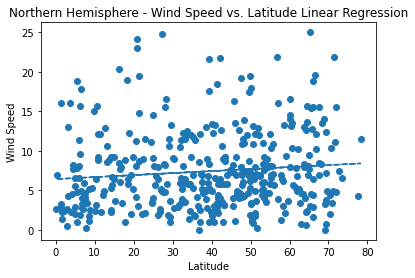

In [96]:
 plt.scatter(north_latitude, wind_speed_north)

slope, intercept, r, p, std_err = st.linregress(north_latitude, wind_speed_north)
fit = slope * north_latitude + intercept
plt.plot(north_latitude,fit,"--")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.savefig('Output_data/Fig11.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

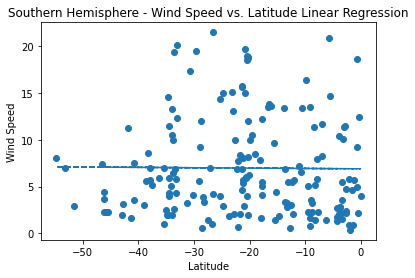

In [97]:
 plt.scatter(south_latitude, wind_speed_south)

slope, intercept, r, p, std_err = st.linregress(south_latitude, wind_speed_south)
fit = slope * south_latitude + intercept
plt.plot(south_latitude,fit,"--")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.savefig('Output_data/Fig12.png')
plt.show()